# spectra_post 
Jupyter notebook for post processing spectra files from WinSpec

Uses spectroscopy.py library
written by Peter Ningren Han;
modified by Nili Persits and Jaehwan Kim.

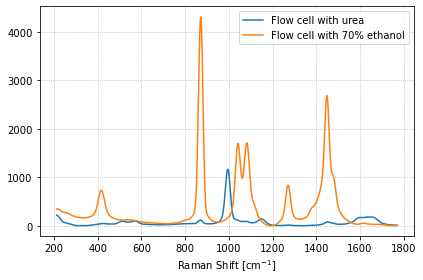

In [2]:
%reset -f

import matplotlib.pyplot as plt
from speclib.spectroscopy import *

laser=830.0
filename_dic = {
    'Flow cell with urea':        './data/20210125 Flowcell v2 test/Flow_cell_urea_10x1s1',
    'Flow cell with 70% ethanol': './data/20210125 Flowcell v2 test/Flow_cell_ethanol70percemt_10x1s3',
#     'Flow cell with urea':        './data/20210126 Flowcell v2 test 2/urea_10x1s10',
#     'Flow cell with 70% ethanol': './data/20210126 Flowcell v2 test 2/ethanol70pc_10x1s5',
}

data_dic = {}
for key, file_name in filename_dic.items():
    X, wave = load_txt_new(file_name=file_name, if_plot=False)
#     X, wave = load_txt_auto(file_name=file_name, if_plot=False)
    X_sig, X_bkg = background_remove_full(X, order=3, basis_type='poly', method='Lieber')    
    waveshift = wave_2_waveshift(wave, laser)
    
    data_dic[key] = [waveshift, X_sig[0]]

plt.figure()
for key, data in data_dic.items():
    plt.plot(data[0], data[1], label=key)
plt.legend()
plt.xlabel('Raman Shift [cm$^{-1}$]')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()